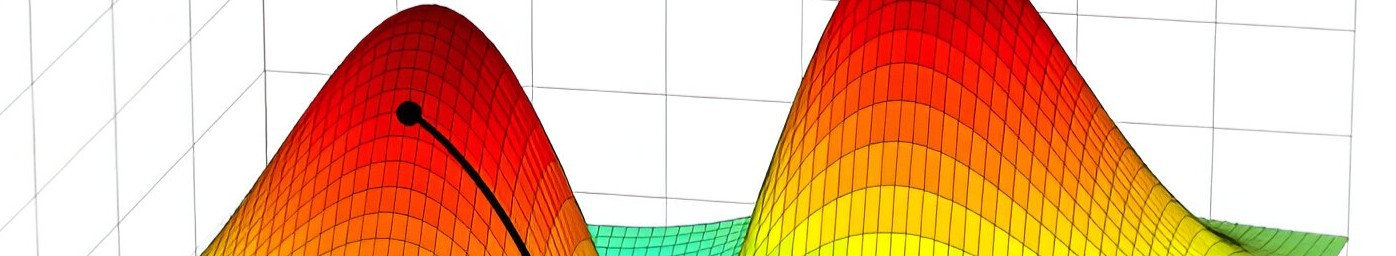

# Laboratorio 3 - Newton-Raphson y gradiente descendente
## Modelado, Simulación y Optimización - 202520
## Profesor de laboratorio: Juan Andrés Méndez

Estudiantes:

- Juan Miguel Delgado - 202314903
- Mauricio Urrego - 202211641

En este cuaderno se solucionarán los 5 problemas presentados en el laboratorio 3 de MOS.

In [ ]:
# installs
!pip install sympy

In [7]:
# imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Problema 1: Newton-Raphson en 2D para polinomios cúbicos

# Problema 2: Análisis de extremos locales y globales

# Problema 3: Newton-Raphson multidimensional

# Problema 4: Gradiente descendente en optimización

## Parte A: Implementación de Gradiente descendente en 3-D

## Formulación matemática

### Función objetivo

Queremos minimizar la siguiente función cuadrática:

$$
L(x, y) = (x - 2)^2 + (y + 1)^2
$$

Esta función mide la "distancia al punto $(2, -1)$" en el plano.
Su forma es la de un paraboloide convexo (como un bowl), lo que garantiza que existe un único mínimo global.

### Vector de parámetros

Definimos el vector de variables o parámetros como:

$$
{\theta} =
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

El objetivo del algoritmo de gradiente descendente será encontrar el valor de ${\theta}$ que minimiza $L(x,y)$.

### Gradiente (cálculo analítico)

El gradiente indica la dirección de máximo crecimiento de la función.
Derivando parcialmente respecto a $x$ y $y$:

$$
\nabla L(x,y) =
\begin{bmatrix}
\dfrac{\partial L}{\partial x}\\
\dfrac{\partial L}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
2(x - 2)\\
2(y + 1)
\end{bmatrix}
$$

En gradiente descendente nos movemos en la dirección contraria a este vector para reducir el valor de $L$.

### Matriz Hessiana (curvatura de la función)

La Hessiana describe la curvatura local de la superficie:

$$
H(L) =
\begin{bmatrix}
\dfrac{\partial^2 L}{\partial x^2} & \dfrac{\partial^2 L}{\partial x \partial y} \\
\dfrac{\partial^2 L}{\partial y \partial x} & \dfrac{\partial^2 L}{\partial y^2}
\end{bmatrix} =
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
= 2I_2
$$

Es una matriz simétrica y definida positiva, lo que confirma que la función es convexa.
Los autovalores son $\lambda_1 = \lambda_2 = 2$.
El mayor autovalor ($L_g = 2$) es la constante de Lipschitz del gradiente, importante para definir el rango de pasos estables en el descenso.

### Regla de actualización (Gradiente Descendente)

En cada iteración $k$, el vector de parámetros se actualiza como:

$$
{\theta}*{k+1} = {\theta}*{k} - \alpha , \nabla L({\theta}_k)
$$

donde $\alpha > 0$ es el tamaño del paso
y $\nabla L({\theta}_k)$ es el gradiente en la iteración actual.

De otra forma:

$$
x_{k+1} = x_k - \alpha \cdot 2(x_k - 2)
$$

$$
y_{k+1} = y_k - \alpha \cdot 2(y_k + 1)
$$

### Condiciones de convergencia

En funciones cuadráticas convexas, el método converge si el paso $\alpha$ cumple:

$$
0 < \alpha < \frac{2}{L_g}
$$

Dado que $L_g = 2$, se obtiene:

$$
0 < \alpha < 1
$$

Si $\alpha$ es demasiado pequeño, el algoritmo será lento.
Si $\alpha \ge 1$, la secuencia diverge (el valor de $L$ crece en lugar de decrecer).

### Solución analítica (óptimo global)

Para encontrar el mínimo exacto, igualamos el gradiente a cero:

$$
\nabla L(x, y) = 0
\Rightarrow
\begin{cases}
2(x - 2) = 0 \\
2(y + 1) = 0
\end{cases}
\Rightarrow
x^\star = 2,\quad y^\star = -1
$$

El valor mínimo de la función es:

$$
L(2, -1) = 0
$$

Este es el punto al que debería converger el algoritmo.

### Criterios de parada (para detener el algoritmo)

El proceso iterativo debe detenerse cuando se cumpla alguna de las siguientes condiciones:

Gradiente pequeño:
$$
|\nabla L(\boldsymbol{\theta}_k)|_2 < \text{tol}
$$
(la función está cerca de un mínimo).

Cambio pequeño entre iteraciones:
$$
|\boldsymbol{\theta}_{k+1} - \boldsymbol{\theta}_k|_2 < \text{tol}
$$
(ya no hay progreso significativo).

Límite de iteraciones:
$$
k \ge k_{\max}
$$
(para evitar ciclos infinitos).

## Cálculo analítico del gradiente


A continuación calculamos analíticamente el gradiente de la función de pérdida con ayuda de `sympy`, corroborando los cálculos hechos anteriormente.

In [6]:
# definir variables simbólicas
x, y = sp.symbols('x y')

# definir la función de pérdida
L = (x - 2)**2 + (y + 1)**2

# calcular derivadas parciales
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)

# construir el vector gradiente
grad_L = sp.Matrix([dL_dx, dL_dy])

# mostrar resultados
print("Función de pérdida L(x, y):")
display(L)

print("Gradiente de L(x, y):")
display(grad_L)


Función de pérdida L(x, y):


(x - 2)**2 + (y + 1)**2

Gradiente ∇L(x, y):


Matrix([
[2*x - 4],
[2*y + 2]])

## Implementación del algoritmo de gradiente descendente y trayectorias

A continuación, se presenta el código que implementa el algoritmo de gradiente descendente para minimizar la función cuadrática $(L(x, y) = (x - 2)^2 + (y + 1)^2)$. Primero, se define la función de pérdida y su gradiente analítico, que indica la dirección de mayor crecimiento de $L$. Luego, a partir de un punto inicial ($(-3, 4)$), el algoritmo actualiza los valores de $x$ y $y$ en dirección opuesta al gradiente, con una magnitud controlada por el parámetro de paso ($\alpha$). Se realizan múltiples ejecuciones del proceso para diferentes valores de ($\alpha$), registrando la trayectoria de los parámetros en el plano. 

Finalmente, graficamos la función y ponemos las trayectorias seguidas por el gradiente descendente para cada valor de $\alpha$, junto con el punto óptimo analítico ($(2, -1)$).

α = 0.05
  Iteraciones: 100
  Punto final: (x, y) = (1.999867193005562, -0.999867193005562)
  L(x, y) final = 3.52753955432896e-08
  Error respecto al óptimo = 0.0001878174527121737

α = 0.1
  Iteraciones: 64
  Punto final: (x, y) = (1.9999968614491324, -0.9999968614491324)
  L(x, y) final = 1.9701003097564248e-11
  Error respecto al óptimo = 4.4385812032184615e-06

α = 0.4
  Iteraciones: 10
  Punto final: (x, y) = (1.999999488, -0.999999488)
  L(x, y) final = 5.242879999028233e-13
  Error respecto al óptimo = 7.240773438679208e-07

α = 0.8
  Iteraciones: 32
  Punto final: (x, y) = (1.9999996020669444, -0.9999996020669444)
  L(x, y) final = 3.1670143350708814e-13
  Error respecto al óptimo = 5.627623241716596e-07



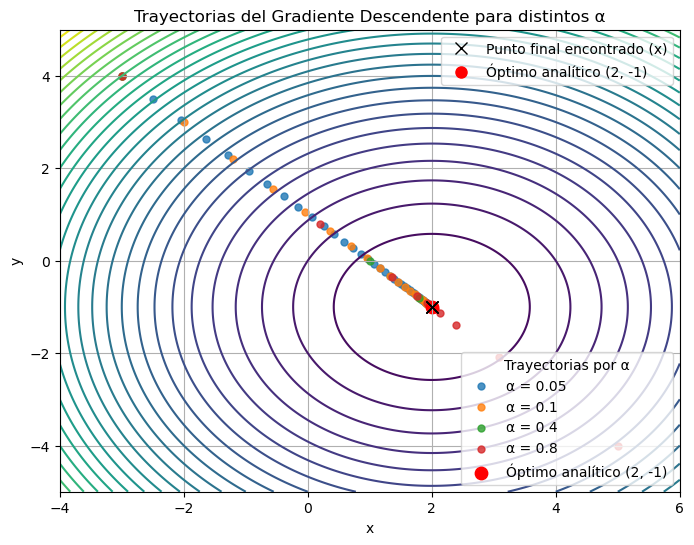

In [11]:
# definición de la función de pérdida y su gradiente
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

def grad_L(x, y):
    # Gradiente analítico: grad L(x, y) = [2(x-2), 2(y+1)]
    dL_dx = 2 * (x - 2)
    dL_dy = 2 * (y + 1)
    return np.array([dL_dx, dL_dy])

# parametros iniciales
theta0 = np.array([-3.0, 4.0])   # punto inicial random
max_iter = 100
tol = 1e-6 # gradiente pequeño

# Valores de alfa  para comparar
alphas = [0.05, 0.1, 0.4, 0.8]

# Punto óptimo analítico
theta_star = np.array([2.0, -1.0])

# c reamos figura
fig, ax = plt.subplots(figsize=(8, 6))

# contorno de la función
x_vals = np.linspace(-4, 6, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = L(X, Y)
ax.contour(X, Y, Z, levels=30, cmap="viridis")

# ejecutar gradiente descendente para cada alfa
for alpha in alphas:
    theta = theta0.copy()
    trayectoria = [theta.copy()]
    
    for k in range(max_iter):
        grad = grad_L(theta[0], theta[1])
        new_theta = theta - alpha * grad
        
        # criterio de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        theta = new_theta
        trayectoria.append(theta.copy())
    
    trayectoria = np.array(trayectoria)
    
    # graficamos trayectoria 
    ax.scatter(trayectoria[:, 0], trayectoria[:, 1], s=25, label=f'α = {alpha}', alpha=0.8)
    ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'x', color='black', markersize=8)

    # Calcular y mostrar resultados finales
    L_final = L(theta[0], theta[1])
    error = np.linalg.norm(theta - theta_star)
    print(f"α = {alpha}")
    print(f"  Iteraciones: {len(trayectoria)-1}")
    print(f"  Punto final: (x, y) = ({theta[0]}, {theta[1]})")
    print(f"  L(x, y) final = {L_final}")
    print(f"  Error respecto al óptimo = {error}\n")
    
# Marcar el punto óptimo analítico
ax.scatter(theta_star[0], theta_star[1], color='red', s=80, label='Óptimo analítico (2, -1)')

# labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectorias del Gradiente Descendente para distintos α')
ax.legend()
plt.grid(True)

# Leyenda personalizada
custom_legend = [
    plt.Line2D([0], [0], color='black', marker='x', linestyle='', markersize=8, label='Punto final encontrado (x)'),
    plt.Line2D([0], [0], color='red', marker='o', linestyle='', markersize=8, label='Óptimo analítico (2, -1)'),
]
first_legend = ax.legend(handles=custom_legend, loc='upper right')
ax.add_artist(first_legend)
ax.legend(loc='lower right', title='Trayectorias por α')

plt.show()

En la gráfica se pueden ver los contornos de la función de pérdida y los puntos generados por el algoritmo de gradiente descendente para distintos valores de la tasa de aprendizaje $\alpha$ (se omite una línea que una los puntos para evitar superposiciones, sin embargo la trayectoria es evidente). Cada conjunto de puntos representa la trayectoria de actualización de los parámetros desde la posición inicial hacia el mínimo. Las X negras indican el punto final alcanzado por el algoritmo en cada caso, mientras que el círculo rojo marca el óptimo analítico ($(2, -1)$). 

Al variar el parámetro de paso $\alpha$, la velocidad y estabilidad de la convergencia cambian significativamente. Los valores pequeños garantizan una convergencia lenta pero estable, mientras que los valores grandes, aunque aceleran el proceso, pueden causar inestabilidad u oscilaciones si exceden el límite óptimo.

## Comparación con la solución analítica.

Los resultados obtenidos muestran que el algoritmo de gradiente descendente converge de manera muy precisa hacia la solución óptima analítica ($(x^\star, y^\star) = (2, -1)$) para todos los valores de $\alpha$ utilizados, aunque con diferentes velocidades. Para $\alpha = 0.05$, la convergencia es estable pero más lenta, alcanzando un error del orden de $10^{-4}$ tras 100 iteraciones. Al aumentar el paso a $\alpha = 0.1$, el algoritmo requiere menos iteraciones (64) y logra un error mucho menor. Con $\alpha = 0.4$, la convergencia se vuelve aún más rápida, alcanzando prácticamente el valor óptimo en solo 10 iteraciones, con un error de $7\times10^{-7}$. Incluso con $\alpha = 0.8$, que está cerca del límite teórico de estabilidad, el método sigue siendo preciso y converge en 32 iteraciones, con un error pequeño.

## Análisis la sensibilidad a $\alpha$ y estrategias para su elección óptima

El método de gradiente descendente es muy sensible al valor de la tasa de aprendizaje $\alpha$, ya que este parámetro controla el tamaño de los pasos que da el algoritmo hacia el mínimo. Si $\alpha$ es demasiado pequeño, el descenso es muy lento y necesita muchas iteraciones para acercarse al punto óptimo. Si, por el contrario, $\alpha$ es muy grande, el algoritmo puede oscilar alrededor del mínimo o incluso divergir, alejándose en lugar de acercarse. En este problema, se observó que valores intermedios como $\alpha = 0.4$ ofrecieron el mejor equilibrio entre rapidez y estabilidad, mientras que valores más pequeños tardaron más y valores cercanos al límite (como $\alpha = 0.8)$ fueron menos estables. 

En general, para elegir un buen $\alpha$, se recomienda empezar con un valor pequeño e ir aumentándolo gradualmente mientras la función de pérdida siga disminuyendo. De igual modo, para gradiente descendente con paso fijo existe un paso "óptimo" teórico que minimiza el factor de contracción lineal: $\alpha_{\text{opt}} = \dfrac{2}{\lambda_{\max}+\lambda_{\min}}$, y la tasa de convergencia depende del número de condición $\kappa=\lambda_{\max}/\lambda_{\min}$ (mejor cuando ($\kappa$ cercano a 1)*. En este problema $\lambda_{\min}=\lambda_{\max}=2$, de modo que $\alpha_{\text{opt}}=0.5$, lo que explica por qué valores intermedios como 0.4 dieron rápida convergencia sin inestabilidad. 

\* Optimization Bootcamp: Gradient Descent, https://faculty.washington.edu/sbrunton/OptimizationBootcamp.pdf, página 49.
  

## Parte B: Comparación entre Newton-Raphson y Gradiente Descendente

## Cálculo analítico del gradiente y la matriz Hessiana
## Implementación algoritmos
## Experimentación con valores de $\alpha$ y valor óptimo
## Gráfica de trayectoria de convergencia
## Análisis comparativo
## Mejor método
## Tabla comparativa
## Visualización

# Problema 5: Descenso de gradiente y descenso de gradiente basado en momento